In [1]:
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets.widgets import *

%matplotlib inline
def setPlotSize( x , y ):
    plt.rcParams['figure.figsize'] = (x,y)

def plot_velocities( f , l = -2 , r = 2 , b = -2 , t = 2, n = 20):
    
    setPlotSize(20,10)
    x,y = np.mgrid[ l:r:complex(0,n) , b:t:complex(0,n) ]
    
    vx,vy = f(x,y)
    
    fig , (ax1 , ax2 ) = plt.subplots(ncols=2)
    
    ax1.quiver( y,x , vx,vy , pivot='mid' , linewidth = 0.1)
    
    lw = vx*vx + vy*vy
    lw = lw / lw.max()
    lw = (-lw + 2 * np.sqrt(lw)) * 4
    ax2.streamplot(y,x, vy, vx , color='k' , density=1 , linewidth=lw)
    plt.show()

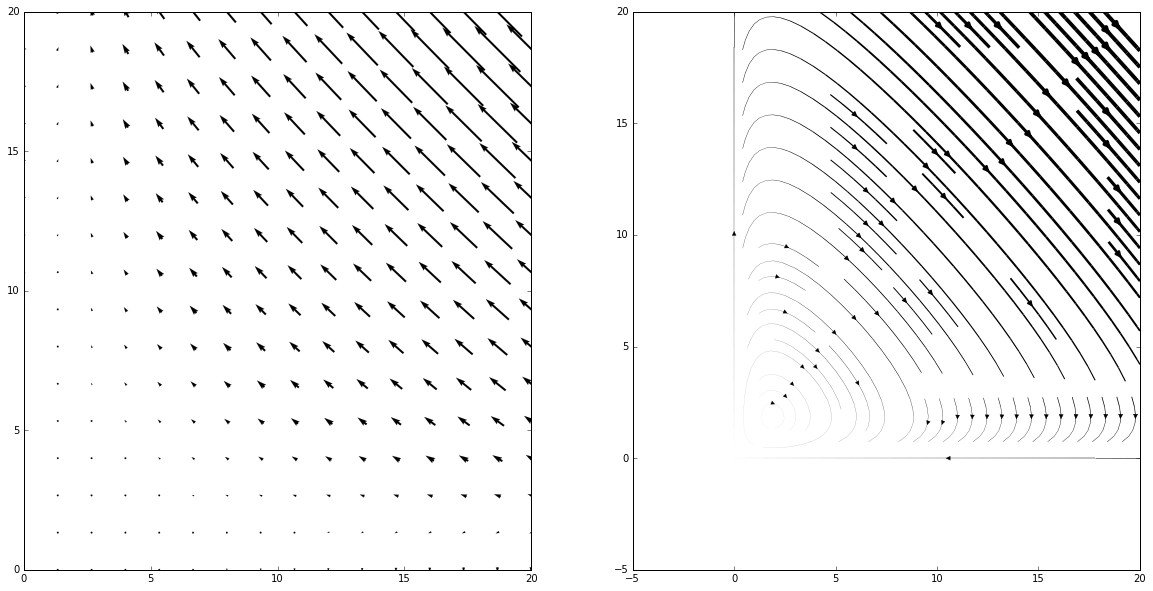

In [2]:
def plot_raub( a , b , c , d , size , details ):

    def raubbeute(x,y):
        return (a*x - b*x*y , -c*y + d*x*y)

    plot_velocities( raubbeute , 0 , size , 0 , size ,  details )
    

res = interact( plot_raub , 
              a = FloatSlider(min=0, max=5.0, step=0.1, value=2.2),
              b = FloatSlider(min=0, max=5.0, step=0.1, value=1.2),
              c = FloatSlider(min=0, max=5.0, step=0.1, value=2.2),
              d = FloatSlider(min=0, max=5.0, step=0.1, value=1.2),
              size = FloatSlider(min=1,max=100,step=1,value = 5),
              details = FloatSlider(min=10,max=100,step=1,value = 16),)

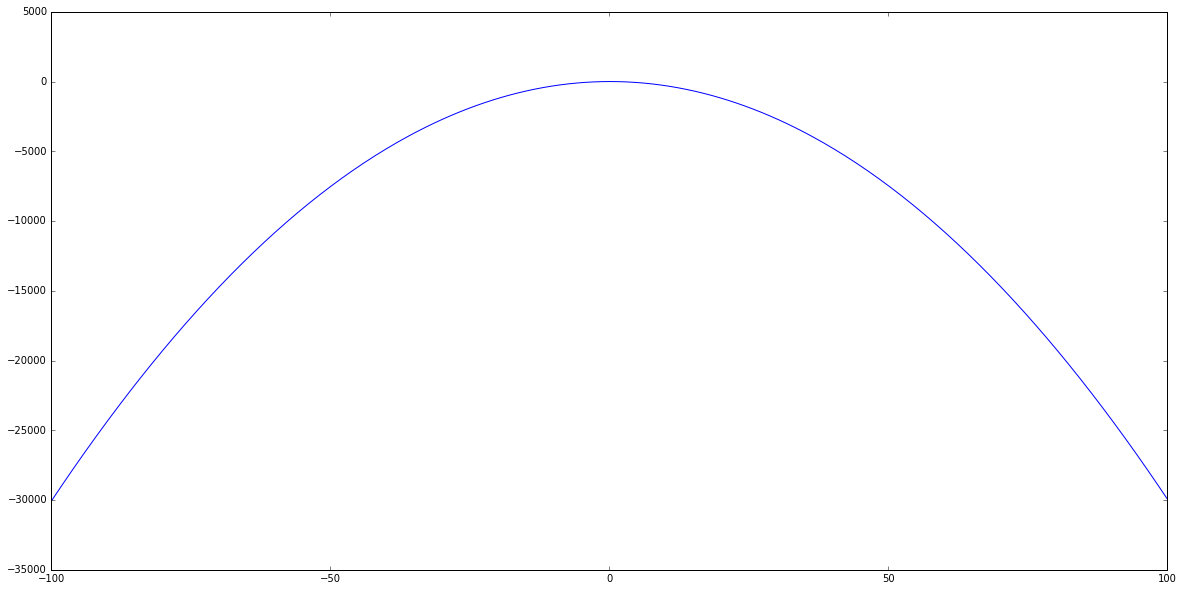

In [6]:
def plots( a , b , c , d , size , details ):

    x = np.linspace(-100,100,400)
    plt.plot(x , -3*x*x + x - a * ( x+1) )
    

res = interact( plots , 
              a = FloatSlider(min=0, max=5.0, step=0.1, value=2.2),
              b = FloatSlider(min=0, max=5.0, step=0.1, value=1.2),
              c = FloatSlider(min=0, max=5.0, step=0.1, value=2.2),
              d = FloatSlider(min=0, max=5.0, step=0.1, value=1.2),
              size = FloatSlider(min=1,max=100,step=1,value = 5),
              details = FloatSlider(min=10,max=100,step=1,value = 16),)

In [14]:

def analyseSkalarOde( f , left = 1.0 , right = 1.0 , bottom = 1.0 , top = 1.0 ):

    def plot_helper(  size , details ):
        plot_velocities( lambda t,x : (f(x,t) , t*0 +1.) , -size*bottom, size*top, -size*left, size*right,  details )
    
    res = interact( plot_helper , 
              # t = FloatSlider(min=1,max=100,step=1,value = 5),
              size = FloatSlider(min=1,max=100,step=1,value = 5),
              details = FloatSlider(min=10,max=100,step=1,value = 16),)

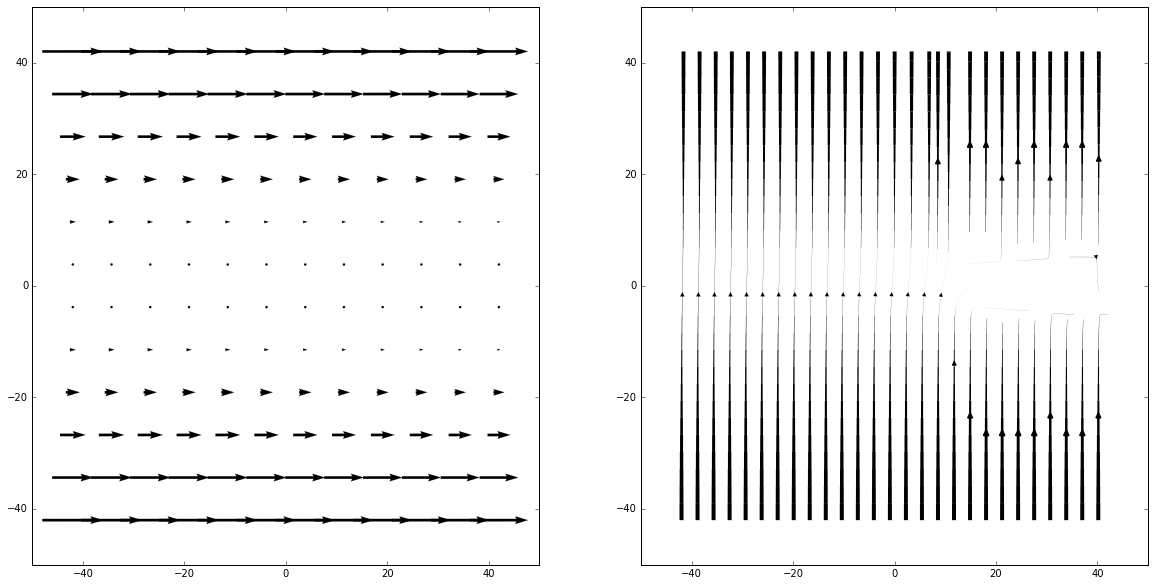

In [15]:
analyseSkalarOde( lambda t,x : x*x - t)

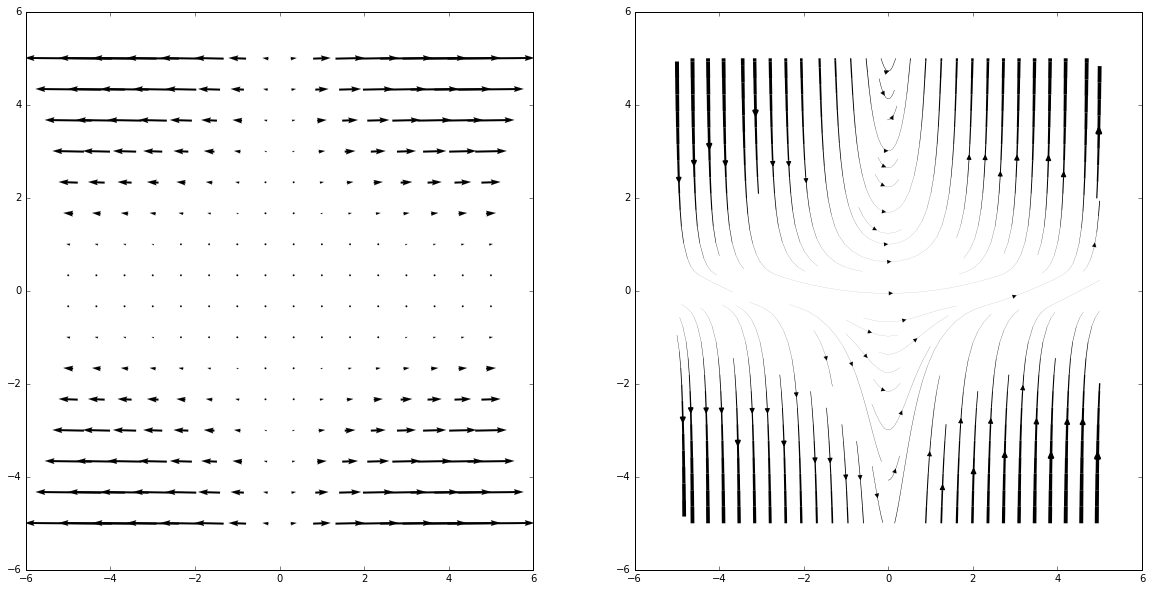

In [16]:
analyseSkalarOde( lambda t,x : x*x * t)

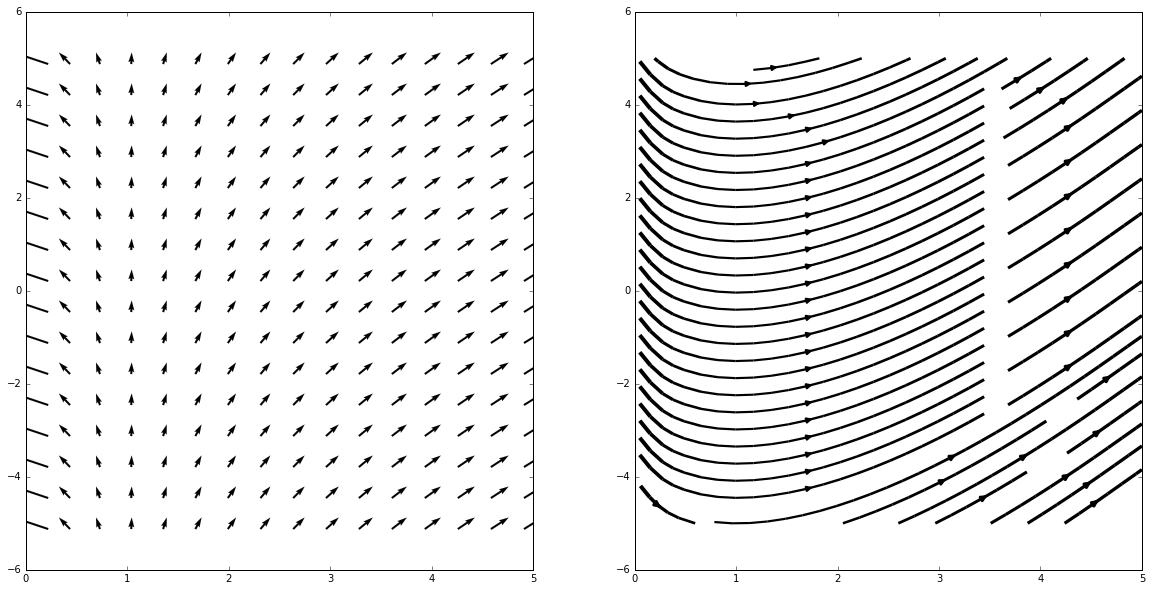

In [17]:
analyseSkalarOde( lambda t,x : np.log(t) , left = -0.01)

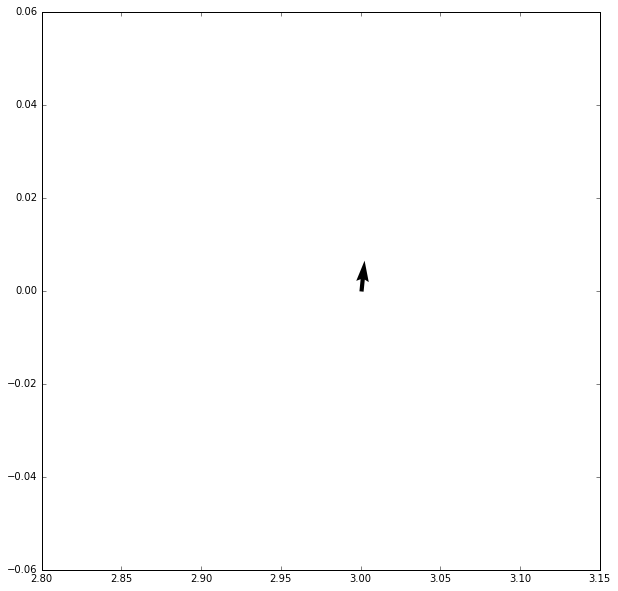

In [18]:
setPlotSize(10,10)
plt.quiver( 3, 0 , 1 , 10 )
setPlotSize(20,10)